In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Load the dataset with pandas
earthquake_raw = pd.read_csv('earthquake_data.csv')


In [4]:
# Describe the dataset
print(earthquake_raw.describe())

           latitude     longitude         depth           mag          nst  \
count  10335.000000  10335.000000  10335.000000  10334.000000  8847.000000   
mean      37.478979   -110.241898     19.741614      1.593724    23.774839   
std       18.566369     63.654904     48.901498      1.305618    22.035451   
min      -62.969400   -179.996400     -3.730000     -1.170000     0.000000   
25%       33.196750   -150.113850      3.180000      0.750000     9.500000   
50%       38.245167   -119.948400      7.680000      1.300000    17.000000   
75%       46.867417   -110.808000     14.065000      2.030000    31.000000   
max       81.347900    179.975200    638.038000      7.600000   269.000000   

               gap         dmin           rms  horizontalError    depthError  \
count  8847.000000  6856.000000  10335.000000      7862.000000  10334.000000   
mean    118.546751     0.941792      0.260710         1.793784      2.337288   
std      63.165746     3.086871      0.263019         3.2

In [5]:
# group by mag type to see unique values
earthquake_raw.groupby('magType').count()['mag']

magType
mb        992
mb_lg       7
md       3199
mh         11
ml       5994
mlr         4
mlv         1
mw          8
mwr        28
mww        90
Name: mag, dtype: int64

In [6]:
#-------------------------------------------
# Data Cleaning
#-------------------------------------------
# group by 'type' to see unique values
# I chose the id column because every row should have a unique id so that 
# would give me an acurate count of the number of rows in each group
earthquake_raw.groupby('type').count()['id'] 

# conclusion: choosing earthquakes to study I should remove all the other rows from the dataset
 
earthquake_iso = earthquake_raw[earthquake_raw['type'] == 'earthquake']
earthquake_iso.groupby('type').count()['id'] # check to see if the rows were removed

# conclusion: earthquake_iso is the new dataset that only includes earthquakes


type
earthquake    10145
Name: id, dtype: int64

In [7]:
#-------------------------------------------
# New Data Exploration
#-------------------------------------------
earthquake_iso.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10145.000000,10145.000000,10145.000000,10144.000000,8661.000000,8661.000000,6670.000000,10145.000000,7705.000000,10144.000000,8365.000000,8653.000000
mean,37.434758,-110.119316,20.120326,1.597582,23.866528,118.314526,0.964100,0.260649,1.807118,1.899384,0.276746,15.223391
std,18.715815,64.228604,49.278179,1.316655,22.170439,63.044366,3.126601,0.264173,3.224995,6.838656,0.519639,28.406674
min,-62.969400,-179.996400,-3.730000,-1.170000,0.000000,11.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.183333,-150.463000,3.490000,0.730000,10.000000,71.000000,0.027580,0.100000,0.280000,0.480000,0.106000,4.000000
50%,38.316700,-119.994500,7.810000,1.300000,17.000000,101.000000,0.062984,0.150000,0.470000,0.790000,0.167000,7.000000
75%,46.888167,-110.807167,14.300000,2.050000,31.000000,155.000000,0.159875,0.330000,0.970000,1.540158,0.250000,16.000000
max,81.347900,179.975200,638.038000,7.600000,269.000000,350.000000,40.850000,2.470000,22.250000,431.600000,5.520000,645.000000


In [8]:
#-------------------------------------------
# Further cleaning by gap data
#-------------------------------------------
# for location and depth explorations I should remove gap values of larger than 180 degrees
# as according to the documentation the gap values larger that 180 degrees, represent 
# location and depth data that has large uncertainties. The smaller the number the more accurate. 
# lets remove those and then see the rest in a scatter plot. 

earthquake_gap_iso = earthquake_iso[earthquake_iso['gap'] < 180]


locationSource
av     398
ci    1375
hv     949
nc    1460
nm      24
nn     424
ok     337
pr      97
se      10
tx     208
us    1158
uu     450
uw     224
Name: gap, dtype: int64

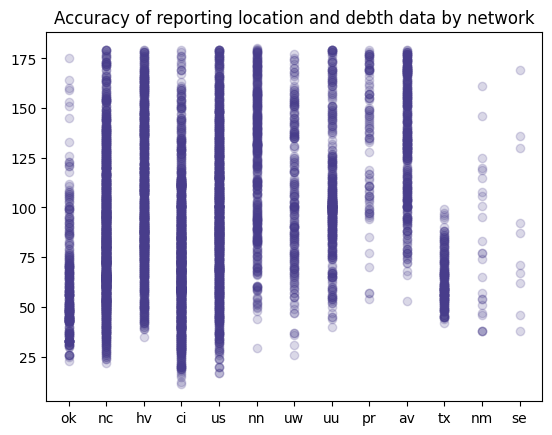

In [9]:
#-------------------------------------------
# Comparison of gap measurements to seismic stations
#-------------------------------------------

# the point of this comparison was to see if there are any networks that 
# are consistantly providing an inaccurate location (horizontal) and depth data

# plot the gap data in a scatter plot
plt.scatter(earthquake_gap_iso['locationSource'], earthquake_gap_iso['gap'],c='darkslateblue', marker='o', alpha=0.2)
# add a title
plt.title('Accuracy of reporting location and debth data by network')

# group by location source to see unique values
earthquake_gap_iso.groupby('locationSource').count()['gap']

Text(0, 0.5, 'Gap measurement (%)')

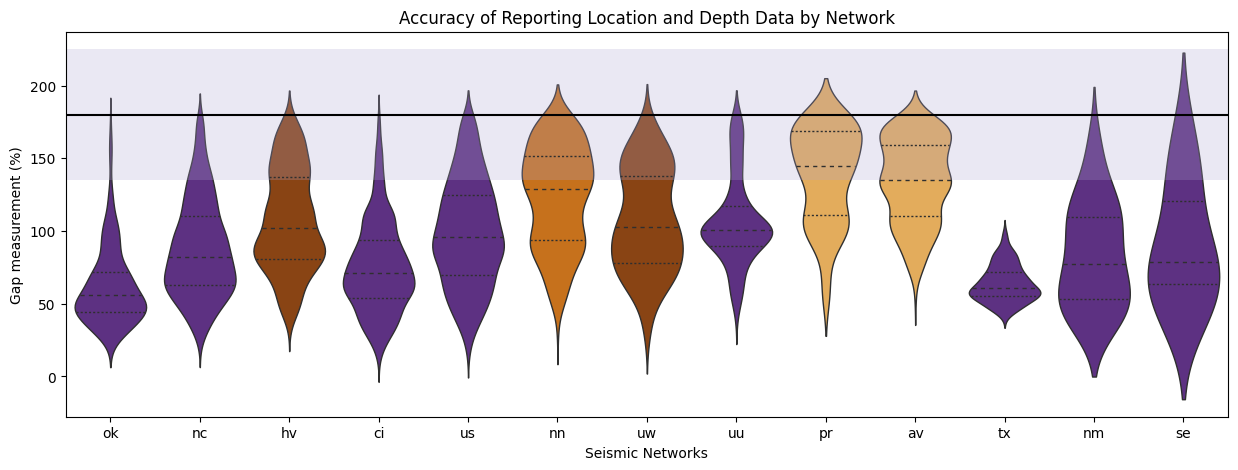

In [77]:
# remove any rows containing 'ak' in location source column
earthquake_gap = earthquake_gap_iso[(earthquake_gap_iso['locationSource'] != 'ak')]

# create a violin plot showing the gap column grouped by location source
purple = ['#5e238f',  '#5e238f',  '#5e238f',  '#5e238f', '#5e238f',  '#5e238f', '#5e238f', '#5e238f', '#5e238f',  '#5e238f',  '#5e238f',  '#5e238f',  '#5e238f']
orange = ['#df9c20']
# change purple[8] to '#df9c20'
#purple[10] = '#7c62aa'
purple[8] = '#fab045'
purple[9] = '#fab045' 
purple[6] = '#9d4100'
purple[5] = '#e27100'
purple[2] = '#9d4100'

plt.figure(figsize=(15,5))

ax = sns.violinplot(x='locationSource', y='gap', data=earthquake_gap, palette=purple, bw_method = 0.05, inner='quartile', linewidth=1, scale='width')

# plot a horizontal line at 180 degrees
plt.axhline(y=180, color='black', linestyle='-')


# draw a transparent red rectangle above and below 180 degrees by 25%
ax.axhspan(180*.75, (180*.25)+180, facecolor='#afa5d1', alpha=0.25)

# adding labels and title
ax.set_title('Accuracy of Reporting Location and Depth Data by Network')
ax.set_xlabel('Seismic Networks')
ax.set_ylabel('Gap measurement (%)')


In [11]:
#-------------------------------------------
# Lets look at magnitude data and clean
#-------------------------------------------
earthquake_gap_iso["mag"].describe()

# typical values are between [-1, 10] so lets remove the outliers
# I can see the min value is -1.17 so there are outliers below that
# but the max value is 7.6 which is under 10 so there are no outliers above that
earthquake_mag_iso = earthquake_gap_iso[earthquake_gap_iso['mag'] > -1]

# lets also check for any empty cells in the mag column
# the result is zero so we have complete data 
earthquake_mag_iso['mag'].isnull().sum()

# Lets also use the magError column to remove any outliers
# Typical values are between [0, 100] so lets remove any values outside of that range
earthquake_mag_iso = earthquake_mag_iso[earthquake_mag_iso['magError'] <= 100]
earthquake_mag_iso = earthquake_mag_iso[earthquake_mag_iso['magError'] >= 0]
# lets also remove any values that == 'unknown' which means the data was not provided
earthquake_mag_iso = earthquake_mag_iso[earthquake_mag_iso['magError'] != 'unknown']

# lets analyse the magError column
# there are no empty cells
earthquake_mag_iso['magError'].isnull().sum()
# there are 6838 rows in the dataset still
# the range of magError values is between 0 and 5.52 out of 100 so im confident the remaining mag values are pretty accurate
earthquake_mag_iso['magError'].describe()


count    6838.000000
mean        0.274925
std         0.535434
min         0.000000
25%         0.105654
50%         0.163000
75%         0.239314
max         5.520000
Name: magError, dtype: float64

In [12]:
#-------------------------------------------
# Lets focus on the highest magnitude earthquakes
#-------------------------------------------
# lets view the mag column data again 
# the highest recorded magnitude is 7.6 which out of 10 is pretty high
earthquake_mag_iso['mag'].describe()

# lets reorder my table by magnitude
earthquake_mag_iso = earthquake_mag_iso.sort_values(by=['mag'], ascending=False)

# lets see the top 10 highest magnitude earthquakes
earthquake_mag_iso.head(10)

# lets see all mag values from 6 and above
earthquake_mag_iso[earthquake_mag_iso['mag'] >= 6]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8038,2022-09-19T18:05:06.316Z,18.4831,-102.9999,16.183,7.6,mww,159.0,69.0,2.037,0.91,...,2022-10-07T17:21:41.627Z,"35 km SW of Aguililla, Mexico",earthquake,9.08,3.034,0.025,159.0,reviewed,us,us
9845,2022-09-14T11:04:06.558Z,-21.1909,170.2666,137.000,7.0,mww,192.0,45.0,2.977,0.65,...,2022-09-29T13:31:20.161Z,"209 km SSE of Isangel, Vanuatu",earthquake,7.64,1.934,0.047,43.0,reviewed,us,us
8674,2022-09-18T06:44:14.735Z,23.1589,121.3160,10.000,6.9,mww,119.0,24.0,0.403,1.18,...,2022-10-12T20:24:34.029Z,"86 km SE of Lugu, Taiwan",earthquake,5.19,1.594,0.038,68.0,reviewed,us,us
7049,2022-09-22T06:16:09.611Z,18.3081,-102.9226,24.119,6.8,mww,128.0,53.0,2.085,1.09,...,2022-10-09T00:46:15.562Z,"Michoacan, Mexico",earthquake,8.14,3.245,0.040,61.0,reviewed,us,us
4613,2022-09-29T03:03:24.076Z,-60.8356,-20.0267,11.000,6.5,mww,125.0,37.0,10.983,0.68,...,2022-10-06T01:05:09.987Z,east of the South Sandwich Islands,earthquake,8.93,1.683,0.049,40.0,reviewed,us,us
8945,2022-09-17T13:41:17.752Z,23.0962,121.4059,10.000,6.5,mww,187.0,37.0,0.409,0.93,...,2022-09-22T07:14:57.979Z,Taiwan,earthquake,4.48,1.543,0.038,67.0,reviewed,us,us
6443,2022-09-23T20:52:57.897Z,3.8048,96.0317,37.994,6.2,mww,196.0,20.0,1.683,0.78,...,2022-09-29T02:39:38.763Z,"38 km SSW of Meulaboh, Indonesia",earthquake,6.17,3.877,0.059,28.0,reviewed,us,us
924,2022-10-09T16:38:04.963Z,-1.3796,-23.9039,10.000,6.2,mww,56.0,82.0,11.523,0.78,...,2022-10-10T16:41:06.361Z,central Mid-Atlantic Ridge,earthquake,10.90,1.860,0.052,35.0,reviewed,us,us
6409,2022-09-23T22:53:26.202Z,-41.3769,-75.5849,10.000,6.1,mww,269.0,49.0,1.588,0.55,...,2022-09-30T04:47:52.272Z,"157 km WNW of Ancud, Chile",earthquake,5.23,1.726,0.044,49.0,reviewed,us,us
7664,2022-09-20T18:23:42.910Z,55.5089,166.3236,10.000,6.0,mww,267.0,52.0,5.141,0.62,...,2022-09-29T18:22:29.033Z,"253 km ESE of Ust’-Kamchatsk Staryy, Russia",earthquake,8.74,1.770,0.030,105.0,reviewed,us,us


[None]

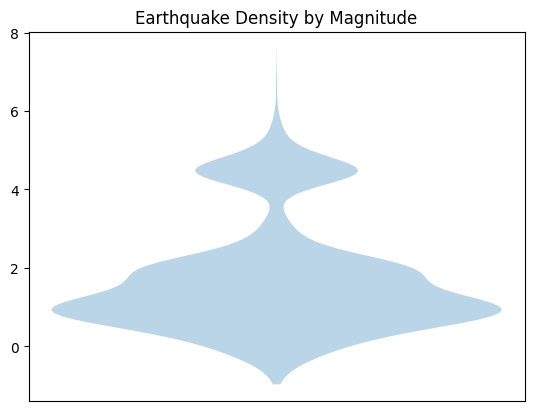

In [13]:
# -------------------------------------------
# Graph showing density of earthquakes by magnitude
# -------------------------------------------
# create a new column that counts the number of earthquakes in each magnitude
earthquake_mag_iso['magCount'] = earthquake_mag_iso.groupby('mag')['mag'].transform('count')


# lets count the unique values in the mag column
earthquake_mag_iso.groupby('mag').count()['magCount']


# lets create a graph showing the density of earthquakes by magnitude
plt.violinplot(earthquake_mag_iso['mag'], showmeans=False, showmedians=False, showextrema=False)

# remove the x axis label
plt.xlabel('')

# remove the x axis numbers
plt.xticks([])

# add a title
plt.title('Earthquake Density by Magnitude')

# change the colour of the violin plot
plt.setp(plt.gca(), 'facecolor', 'white')



# Conclusions:
# the graph shows that the majority of earthquakes are between 0 and 2.5 magnitude



([<matplotlib.axis.YTick at 0x12dfd0580>,
 [Text(1, -1, '−1'),
  Text(1, 0, '0'),
  Text(1, 1, '1'),
  Text(1, 2, '2'),
  Text(1, 3, '3'),
  Text(1, 4, '4'),
  Text(1, 5, '5'),
  Text(1, 6, '6'),
  Text(1, 7, '7')])

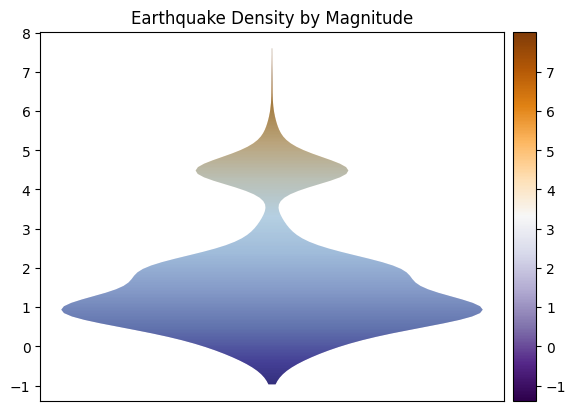

In [14]:
# -------------------------------------------
# Applying a gradient to the graph above and final details
# -------------------------------------------
# most of the code on this page I retrieved from overstack to see how to apply a gradient to the violin graph.
import matplotlib
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


fig, ax = plt.subplots()
violins = ax.violinplot(earthquake_mag_iso['mag'], showmeans=False, showmedians=False, showextrema=False)
# remove the x values as they are not needed
plt.xticks([])
# increase the ammount of y values 
plt.yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
# add a title
plt.title('Earthquake Density by Magnitude')
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

# create a numpy image to use as a gradient
Nx,Ny=1,1000
# creates an array with 1000 rows and 1 column containing numbers from 0 to 1
imgArr = np.tile(np.linspace(0,1,Ny), (Nx,1)).T
# the name of the chosen colour map, the '_r' reverses the colours
cmap = 'PuOr_r'

# this is iterating through the entries in the graph and applying the colour map to them
for violin in violins['bodies']:
    path = Path(violin.get_paths()[0].vertices)
    patch = PathPatch(path, facecolor='none', edgecolor='none')
    ax.add_patch(patch)
    img = ax.imshow(imgArr, origin="lower", extent=[xmin,xmax,ymin,ymax], aspect="auto",
                    cmap=cmap,
                    clip_path=patch)

# colorbar
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("right", size="5%", pad="2%")
norm = matplotlib.colors.Normalize(vmin=ymin, vmax=ymax)
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=matplotlib.cm.get_cmap(cmap),
                                norm=norm,
                                orientation='vertical')


# increase the amount of y axis numbers in the colorbar
plt.yticks(np.arange(-1, 8, 1))



[   0   82  164  246  328  410  492  574  656  738  820  902  984 1066
 1148 1230 1312 1394 1476 1558 1640 1722 1804 1886 1968 2050 2132 2214
 2296 2378 2460 2542 2624 2706 2788 2870 2952 3034 3116 3198 3280 3362
 3444 3526 3608 3690 3772 3854 3936 4018 4100 4182 4264 4346 4428 4510
 4592 4674 4756 4838 4920 5002 5084 5166 5248 5330 5412 5494 5576 5658
 5740 5822 5904 5986 6068 6150 6232 6314 6396 6478 6560 6642 6724 6806]


(array([  4.,   3.,   1.,   7.,   3.,   7.,   9.,   9.,  15.,  15.,  22.,
         19.,  38.,  41.,  25.,  60.,  29.,  58.,  47.,  62.,  52., 109.,
         76.,  61.,  96., 113., 121., 116., 159., 136., 191., 130., 189.,
        226., 187., 213., 127., 183., 151., 195., 107., 129., 117., 112.,
        108.,  92., 106.,  88., 104., 122., 123., 130.,  87., 145.,  90.,
        122.,  91.,  67.,  76.,  72.,  60.,  29.,  46.,  23.,  26.,  12.,
         33.,  17.,  20.,  22.,   5.,  17.,   7.,  15.,   4.,  17.,   3.,
          6.,   6.,   4.,   6.,   3.,   2.,   0.,   2.,   1.,   2.,   0.,
          6.,  36.,   2.,  43.,   0.,  71.,   0., 116.,   1., 155., 150.,
          0., 139.,   0.,  85.,   0.,  52.,   0.,  68.,  31.,   0.,  20.,
          0.,  16.,   0.,  13.,   0.,  12.,   0.,  11.,   4.,   0.,   9.,
          0.,   4.,   0.,   2.,   0.,   2.,   1.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0., 

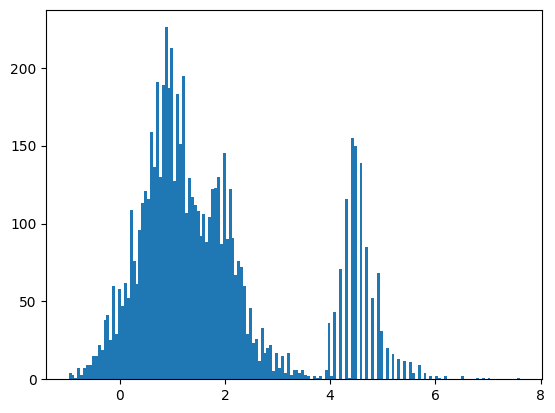

In [15]:
earthquake_mag_iso['magCount'].describe()
# create and array from 0 to 155 with intervals of 12
x = np.arange(0, 6838, 82)
print(x)

plt.hist(earthquake_mag_iso['mag'], bins=155)

